In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv('data/ODI-2022.csv', sep = ';')
df_oud = df
df = df.rename(columns={'Chocolate makes you.....':'chocolate', 'Have you taken a course on machine learning?':'course ML?', 'Have you taken a course on information retrieval?':'course IR?'})
df = df.rename(columns={'Have you taken a course on statistics?':'course stat?', 'Have you taken a course on databases?':'course db?', 'What is your gender?':'gender'})
df = df.rename(columns={'When is your birthday (date)?':'date of birth', 'Number of neighbors sitting around you?':'neighbors sitting', 'Did you stand up?':'stand?', 'What is your stress level (0-100)?':'stress'})
df = df.rename(columns={'What programme are you in?': 'programme', 'Give a random number':'random number', 'Time you went to be Yesterday':'random'})
df = df.rename(columns={'What makes a good day for you (1)?':'good day 1', 'What makes a good day for you (2)?':'good day 2'})
df = df.rename(columns={'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ':'deserving'})

df_oud.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [4]:
df_oud.count()

Tijdstempel                                                                                                                                                                                         304
What programme are you in?                                                                                                                                                                          304
Have you taken a course on machine learning?                                                                                                                                                        304
Have you taken a course on information retrieval?                                                                                                                                                   304
Have you taken a course on statistics?                                                                                                                                                              304


In [684]:

df['course stat?'].describe()

count     304
unique    142
top         7
freq       19
Name: random number, dtype: object

In [825]:
df['course stat?'].value_counts()

mu         243
sigma       33
unknown     28
Name: course stat?, dtype: int64

In [817]:
def numberToFloat(number):
    try:
        return float(number)
    except ValueError:
        print(number)
        return None
    
def correctProgramme(programme):
    programme = programme.lower()
    if 'artificial' in programme or 'ai' in programme:
        return 'Artificial Intelligence'
    elif 'computer' in programme or 'cs' in programme:
        return 'Computer Science'
    elif 'ba' in programme or 'business' in programme:
        return 'Business Analytics'
    elif 'computational' in programme or 'cls' in programme:
        return 'Computational Science'
    elif 'econometrics' in programme or 'research' in programme:
        return 'Econometrics'
    elif 'data' in programme or 'information' in programme:
        return 'Data Science'

    else:
        print(programme)
        return 'other'
    
def toYesNo(answer):
    #print(answer)
    if answer == '0' or answer == 'nee' or answer == 'sigma' or answer == 'no':
        return 0
    if answer == '1' or answer == 'ja' or answer == 'mu' or answer == 'yes':
        return 1
    else:
        return np.nan
    
def formatGoodTime(good):
    smallGood = good.lower()
    if 'sun' in smallGood:
        return "Sun"
    if 'food' in smallGood or 'snacks' in smallGood or '':
        return 'Food'
    if 'weather' in smallGood:
        return 'Weather'
    if 'friends' in smallGood or 'family' in smallGood:
        return "Family and Friends"
    if 'sleep' in smallGood:
        return 'Sleep'
    if 'sport' in smallGood or 'gym' in smallGood or 'workout' in smallGood:
        return 'Exercise'
    if 'coffee' in smallGood:
        return 'Coffee'
    if 'sex' in smallGood:
        return 'Sex'
    else:
        #print(good)
        return good



In [818]:
df1 = pd.DataFrame()
df1['good day 1'] = df['good day 1'].apply(formatGoodTime)
df1['good day 2'] = df['good day 2'].apply(formatGoodTime)
df1['random number'] = df['random number'].apply(numberToFloat)
df1['random number'].median()

Π
1947271047294720^10204847
No
7,66789E+13
omega
e
54.727.163.638.182.600.000.000.000.000.000.000.000
9,13747E+12
sqrt(687458.9665)
6,96788E+14
∞
dont tell me what to do
-34,67


37.0

In [821]:
experience = pd.DataFrame()
experience['Machine Learning'] = df['course ML?'].apply(toYesNo)
experience['Information Retrieval'] = df['course IR?'].apply(toYesNo)
experience['Statistics'] = df['course stat?'].apply(toYesNo)
experience['Databases'] = df['course db?'].apply(toYesNo)
experience['Programme'] = df['programme'].apply(correctProgramme)

#experience = experience.set_index('programme')
experience['total courses'] = experience['Machine Learning'] + experience['Information Retrieval'] + experience['Statistics'] + experience['Databases']

experience['Programme'].value_counts()

fintech
programme?
finance and technology
chrome
duisenberg honours programme in quantitative risk management
medical natural sciences
mpa
none
human language technology
cheese
qrm
seg
advanced
qrm
phd
is:ds
msc finance
phd
engineering and policy analysis, tu delft
qrm
masters eor
human language technology
eor
f&t
exchange program
python
fin: qrm
qrm
biomolecular sciences
e&or
quantitative risk management
eor
human language technology
eor
mpa
quantitative risk management
bisb
biomedical science
e


Artificial Intelligence    114
Computer Science            97
other                       39
Computational Science       37
Data Science                 9
Business Analytics           8
Name: Programme, dtype: int64

In [689]:
experience.head()


,Machine Learning,Information Retrieval,Statistics,Databases,Programme,total courses
0,1.0,0.0,1.0,0.0,Artificial Intelligence,2.0
1,1.0,0.0,1.0,0.0,Data Science,2.0
2,1.0,1.0,1.0,1.0,Computational Science,4.0
3,1.0,0.0,NaN,0.0,Computer Science,NaN
4,1.0,1.0,1.0,1.0,Artificial Intelligence,4.0


In [826]:
distribution = experience['Programme'].value_counts()
courses = experience.groupby('Programme')[['Machine Learning', 'Information Retrieval', 'Statistics', 'Databases', 'total courses']].mean()

courses['distribution'] = distribution
courses['normalized distribution'] = courses['total courses'] / courses['distribution']
courses

,Machine Learning,Information Retrieval,Statistics,Databases,total courses,distribution,normalized distribution
Programme,,,,,,,
Artificial Intelligence,0.600000,0.283019,0.912621,0.526786,2.315217,114,0.020309
Business Analytics,1.000000,0.428571,1.000000,0.500000,3.000000,8,0.375000
Computational Science,0.250000,0.117647,0.882353,0.416667,1.531250,37,0.041385
Computer Science,0.762887,0.318182,0.850575,0.621053,2.545455,97,0.026242
Data Science,0.888889,0.600000,1.000000,0.666667,3.200000,9,0.355556
other,0.540541,0.189189,0.800000,0.405405,1.833333,39,0.047009


Text(0, 0.5, '')

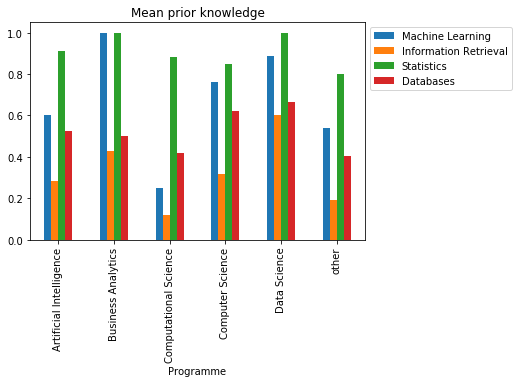

In [827]:
legends = ["Machine Learning, Information Retrieval, Statistics, Databases"]
#fig, ax = plt.subplots()

toplotdf = courses[['Machine Learning', 'Information Retrieval', 'Statistics', 'Databases']]
ax = toplotdf.plot(kind='bar', title="Mean prior knowledge" )
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel('')

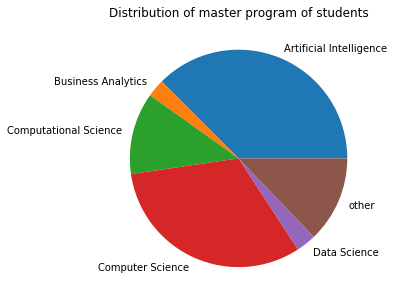

In [828]:
ax=courses.plot.pie(y='distribution', figsize=(5,5), legend=None, title = 'Distribution of master program of students')
ax.set_ylabel(' ')
genderdf = df['gender'].value_counts()

Text(0, 0.5, '')

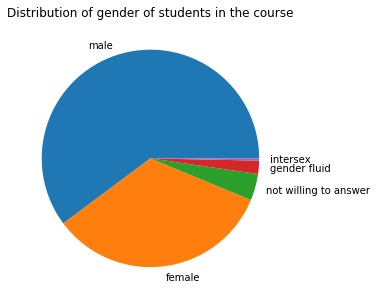

In [706]:
ax = genderdf.plot.pie(y='gender', figsize=(5,5), legend=None, title = 'Distribution of gender of students in the course')
ax.set_ylabel('')

In [715]:
courses2 = courses.reset_index()

In [719]:
courses2

,Programme,Machine Learning,Information Retrieval,Statistics,Databases,total courses,distribution,normalized distribution
0,Artificial Intelligence,66.0,30.0,94.0,59.0,213.0,114,1.868421
1,Business Analytics,8.0,3.0,8.0,4.0,21.0,8,2.625000
2,Computational Science,9.0,4.0,30.0,15.0,49.0,37,1.324324
3,Computer Science,74.0,28.0,74.0,59.0,196.0,97,2.020619
4,Data Science,8.0,3.0,9.0,6.0,16.0,9,1.777778
5,other,20.0,7.0,28.0,15.0,55.0,39,1.410256



# Classification: What programme is the student in?


In [769]:
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [752]:
coursesNorm = pd.DataFrame()
coursesNorm['Programme'] = courses2['Programme']
coursesNorm['distribution'] = courses2['distribution']
coursesNorm['ML'] = courses2['Machine Learning'] / courses2['distribution']
coursesNorm['IR'] = courses2['Information Retrieval'] / courses2['distribution']
coursesNorm['stat'] = courses2['Statistics']/courses2['distribution']
coursesNorm['db'] = courses2['Databases']/courses2['distribution']

experience.dropna()

,Machine Learning,Information Retrieval,Statistics,Databases,Programme,total courses
0,1.0,0.0,1.0,0.0,Artificial Intelligence,2.0
1,1.0,0.0,1.0,0.0,Data Science,2.0
2,1.0,1.0,1.0,1.0,Computational Science,4.0
4,1.0,1.0,1.0,1.0,Artificial Intelligence,4.0
8,1.0,0.0,1.0,1.0,other,3.0
...,...,...,...,...,...,...
298,0.0,0.0,1.0,1.0,Artificial Intelligence,2.0
300,1.0,1.0,1.0,1.0,other,4.0
301,0.0,0.0,1.0,0.0,Computational Science,1.0
302,1.0,0.0,1.0,0.0,Artificial Intelligence,2.0


In [806]:
total = pd.DataFrame().assign(ML = experience['Machine Learning'], IR = experience['Information Retrieval'], stat = experience['Statistics'], db=experience['Databases'], programme=experience['Programme']).dropna()
X = pd.DataFrame().assign(ML = experience['Machine Learning'], IR = experience['Information Retrieval'], stat = experience['Statistics'], db=experience['Databases']).dropna()
y = total['programme']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
X_train.shape, y_test.shape

((162, 4), (81,))

In [829]:

svmclf = svm.SVC(kernel = 'linear', C=2, ).fit(X_train, y_train)
svmclf.score(X_test, y_test)

0.37037037037037035

In [830]:
svmscores = cross_val_score(svmclf, X, y, cv=5)
svmscores.mean()

0.354421768707483

In [831]:
treeclf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
treeclf = treeclf.fit(X_train, y_train)
treescores = cross_val_score(clf, X, y, cv=5)
#y_pred = clf.predict(X_test)
treescores.mean()

0.35

In [832]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [81, 73]

In [833]:
for i in svmscores: 
    print('accuracy support vector: ', i)
print('\nMean accuracy SVM: ', svmscores.mean(), '\n')
for i in treescores:
    print('Accuracy decision tree: ', i)
print( '\nMean accuracy tree: ',treescores.mean())

accuracy support vector:  0.32653061224489793
accuracy support vector:  0.2857142857142857
accuracy support vector:  0.32653061224489793
accuracy support vector:  0.4166666666666667
accuracy support vector:  0.4166666666666667

Mean accuracy SVM:  0.354421768707483 

Accuracy decision tree:  0.3877551020408163
Accuracy decision tree:  0.2857142857142857
Accuracy decision tree:  0.32653061224489793
Accuracy decision tree:  0.4166666666666667
Accuracy decision tree:  0.3333333333333333

Mean accuracy tree:  0.35


In [834]:
categories = ['Artificial Intelligence', 'Business Analytics', 'Computational Science', 'Computer Science', 'Data Science', 'other']
X_train.comment_text

AttributeError: 'DataFrame' object has no attribute 'comment_text'